In [ ]:
!pip install pygam

  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import s, ExpectileGAM

In [ ]:
#Adding the dataset. dataset is obtained from https://www.kaggle.com/datasets/shubham2703/smartphone-retail-outlet-sales-data
df = pd.read_csv('smartphones.csv')
df.head()

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE


Expectile GAM

In [ ]:
#Our main variables
X = df['Price']
y = df['Quantity']

#Our points of interest
quantiles = [0.025, 0.5, 0.975]

gam_resutls = {}

for q in quantiles:
  gam = ExpectileGAM(s(0), expectile=q).fit(X, y)
  gam_resutls[q] = gam

gam_resutls

AttributeError: 'csr_matrix' object has no attribute 'A'

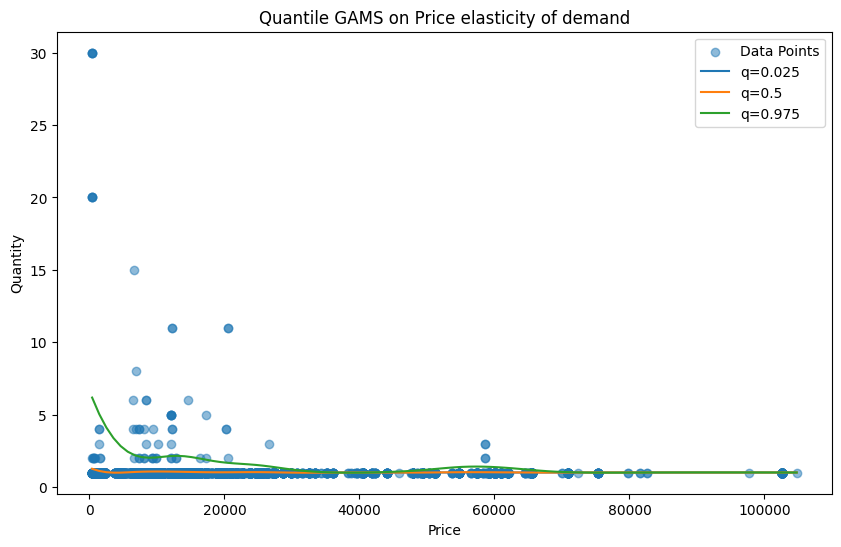

In [ ]:
#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Price'], df['Quantity'], alpha=0.5, label='Data Points')

#plot the quantile GAMS
XX = np.linspace(df['Price'].min(), df['Price'].max(), 100).reshape(-1, 1)
for q, gam in gam_resutls.items():
  plt.plot(XX, gam.predict(XX), label=f'q={q}')

#add title and labels
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Quantile GAMS on Price elasticity of demand')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
from pygam import GAM, l, f
from plotnine import *
import pytimetk as tk
from sklearn.preprocessing import LabelEncoder
import textwrap
import plotly.express as px

In [ ]:
df['is_event'] = 0 #no events in the dataset, events can later be extracted from the dates
df['revenue'] = df['Price'] * df['Quantity']
df.head()

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE,is_event,revenue
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER,0,2042.38
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET,0,2042.38
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE,0,2042.38
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE,0,2042.38
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE,0,2042.38


In [ ]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and year, and aggregate the data
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).agg({
    'Quantity': 'sum',
    'Price': 'mean',  # Or any other aggregation you need
    'revenue': 'sum',
    'is_event': 'sum'
})

# Reset the index to make 'Date' a regular column
monthly_data.reset_index(inplace=True)

# Format the date to show only month and year
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%Y-%m')


# Assuming 'TYPE OF PRODUCT' is the column containing the product type
# Changed 'Product' to 'TYPE OF PRODUCT'
#Group by month, year and product type
monthly_product_data = df.groupby([pd.Grouper(key='Date', freq='M'),'TYPE OF PRODUCT']).agg({
    'Quantity': 'sum',
    'Price': 'mean',  # Or any other aggregation you need
    'revenue': 'sum',
    'is_event': 'sum'
})
monthly_product_data.reset_index(inplace=True)
monthly_product_data['Date'] = monthly_product_data['Date'].dt.strftime('%Y-%m')

#Now you have two dataframes: monthly_data and monthly_product_data
#monthly_data is aggregated by month
#monthly_product_data is aggregated by month and product type
df_agr = monthly_data.head
data = monthly_product_data
data


,Date,TYPE OF PRODUCT,Quantity,Price,revenue,is_event
0,2018-04,ACCESSORY,52,1204.866458,63587.83,0
1,2018-04,MOBILE,132,23537.807652,3106990.61,0
2,2018-04,TABLET,4,11576.275000,46305.10,0
3,2018-05,ACCESSORY,37,1840.486486,68098.00,0
4,2018-05,MOBILE,116,22270.781839,1949468.61,0
...,...,...,...,...,...,...
125,2022-10,ACCESSORY,45,3686.950889,165912.79,0
126,2022-10,TABLET,5,17633.728000,88168.64,0
127,2022-11,ACCESSORY,43,4832.361860,207791.56,0
128,2022-12,ACCESSORY,39,4199.955263,160072.88,0


In [ ]:
fig = px.scatter(df, x='Price', y='Quantity',
                 color='TYPE OF PRODUCT',
                 opacity=0.5,
                 trendline='lowess',
                 trendline_color_override='red',
                 template="none",
                 title='Products Sales: Price vs Quantity',
                 width=800,
                 height=600)

fig

In [ ]:
#lets use the agregated data
fig2 = px.scatter(data, x='Price', y='Quantity',
                 color='TYPE OF PRODUCT',
                 opacity=0.5,
                 trendline='lowess',
                 trendline_color_override='red',
                 template="none",
                 title='Monthly Products Sales: Price vs Quantity',
                 width=800,
                 height=600)

fig2

In [ ]:
#Data prep for regression modeling
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'TYPE OF PRODUCT' column
encoded_product_types = encoder.fit_transform(data[['TYPE OF PRODUCT']])

# Create a new DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_product_types, columns=encoder.get_feature_names_out(['TYPE OF PRODUCT']))

# Concatenate the encoded columns with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Remove the original 'TYPE OF PRODUCT' column
data = data.drop('TYPE OF PRODUCT', axis=1)


# Convert 'Date' to numerical representation (e.g., days since a reference date)
data['Date'] = pd.to_datetime(data['Date'])
reference_date = data['Date'].min()
data['DaysSinceStart'] = (data['Date'] - reference_date).dt.days
data = data.drop('Date', axis=1)

# Define features (X) and target (y)
X = data.drop('Quantity', axis=1)
y = data['Quantity']

In [ ]:
#building our regression model
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     342.1
Date:                Tue, 13 May 2025   Prob (F-statistic):           9.63e-71
Time:                        01:45:29   Log-Likelihood:                -554.31
No. Observations:                 130   AIC:                             1121.
Df Residuals:                     124   BIC:                             1138.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 